In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
data = pd.read_csv('data_i.csv')
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'first_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'second_sp', 'second_dp', 'third_sp', 'third_dp',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine', 'Type_not_mine',
       'Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero'],
      dtype='object')

Anova, chi2, forward selection, backward selection, Recursive Feature Elimination, Lasso, Ridge

In [42]:
y = data['Type_mine']
X = data.drop(['Type_mine','Type_not_mine'], axis = 1)

# ANOVA F-value For Feature Selection 

In [35]:
f_value = SelectKBest(f_classif)
X_best = f_value.fit(X,y)

C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]), <a list of 11 Text yticklabel objects>)

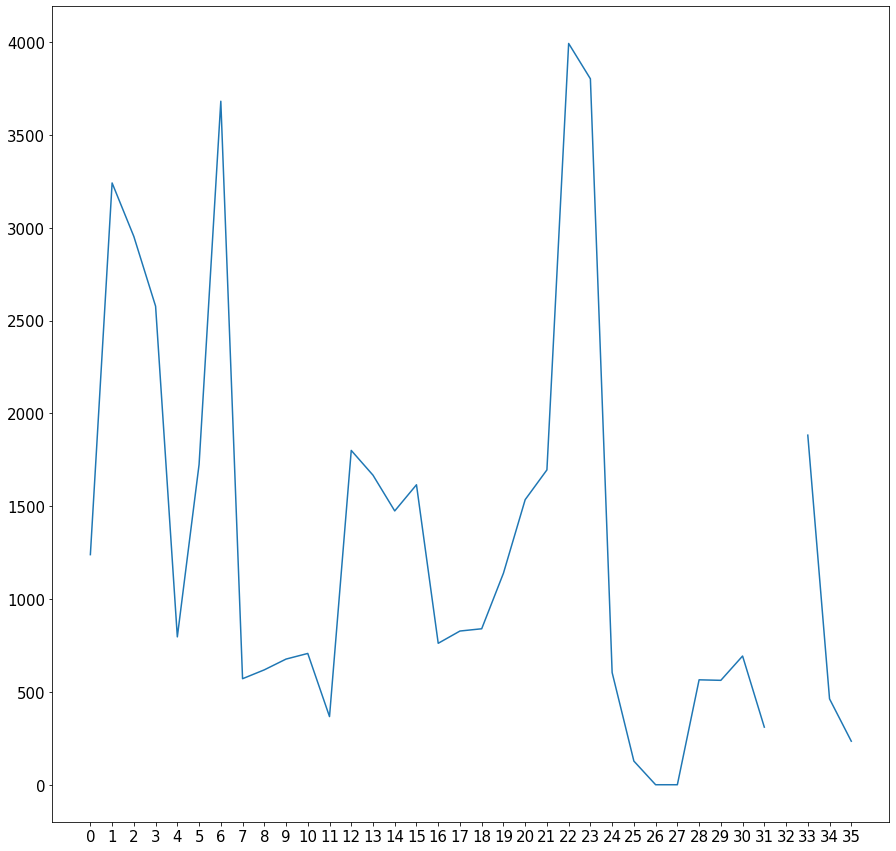

In [60]:
fig, ax = plt.subplots(figsize = (15,15))
scores = X_best.scores_
ax = plt.rcParams["figure.figsize"] = [24,18]
ax = plt.plot(scores)
plt.xticks(np.arange(36),np.arange(36), size = 15 )
plt.yticks(size = 15)

In [57]:
best_features = [1,2,3,6,12,15,20,22,23,33]

In [59]:
temp = data.columns
temp[best_features]

Index(['p1_d', 'p2_d', 'p3_d', 'min_d', '#sp', 'first_dp', 'p2_ib',
       'second_sp', 'second_dp', 'Cryptocurrency_Bitcoin'],
      dtype='object')

# ExtraTreesClassifier

In [48]:
clf = ExtraTreesClassifier(n_estimators = 36)
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)

In [49]:
X[X.columns[model.get_support(indices = True)]].columns

Index(['p1_d', 'min_d', '#dp', 'first_sp', 'first_dp', 'second_sp',
       'second_dp', 'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium'],
      dtype='object')

# LDA

In [52]:
lda = LinearDiscriminantAnalysis(n_components=None)

In [53]:
X_lda = lda.fit(X, y)
X_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [55]:
model = SelectFromModel(X_lda, prefit=True)
X[X.columns[model.get_support(indices = True)]].columns

Index(['min_d', '#sp', '#dp', 'first_dp', 'p1_ip', 'p2_ib', 'p3_ib',
       'second_sp', 'second_dp', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Monero'],
      dtype='object')